In [62]:
import numpy as np
import pandas as pd


In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
RFC=RandomForestClassifier()

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameter={ 'n_estimators':[50,70,100],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,5,6],
    'min_samples_split':[2,3,4]}

In [67]:
Random_frst= GridSearchCV(RFC,parameter,scoring='accuracy',cv=5)

In [68]:
df=pd.read_csv('C:\\Users\\BIT\\OneDrive\\Desktop\\weather_forecast_data.csv')

In [69]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [70]:
df['Rain']=df['Rain'].map({'rain':1,'no rain':0})

In [71]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 117.3 KB


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
df.iloc[:,0:5]

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,23.720338,89.592641,7.335604,50.501694,1032.378759
1,27.879734,46.489704,5.952484,4.990053,992.614190
2,25.069084,83.072843,1.371992,14.855784,1007.231620
3,23.622080,74.367758,7.050551,67.255282,982.632013
4,20.591370,96.858822,4.643921,47.676444,980.825142
...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181
2496,27.558479,46.481744,10.884915,39.715133,1008.590961
2497,28.108274,43.817178,2.897128,75.842952,999.119187
2498,14.789275,57.908105,2.374717,2.378743,1046.501875


In [75]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:5],df.iloc[:,-1],train_size=0.75,random_state=2)

In [76]:
x_train

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
1381,10.754819,64.750102,14.977192,18.007567,1013.434795
1635,21.552438,74.285328,9.815000,86.419662,1019.598381
2064,31.020756,92.640847,14.598524,51.488868,1005.289584
1712,10.092744,66.191638,6.093093,28.671963,1025.152635
1262,21.496880,53.972051,5.433627,93.662887,1026.856999
...,...,...,...,...,...
674,30.560168,63.357824,9.929962,61.732972,1009.300948
2408,15.119534,64.566033,14.082863,74.703965,1021.317591
1099,23.810976,61.150118,4.501101,64.050400,981.622692
2347,16.484345,71.386236,11.917406,19.194779,992.206708


In [77]:
y_train

1381    0
1635    1
2064    0
1712    0
1262    0
       ..
674     0
2408    0
1099    0
2347    0
1608    0
Name: Rain, Length: 1875, dtype: int64

In [78]:
Random_frst.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 70, 100]},
             scoring='accuracy')

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
Random_frst.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [83]:
y_test.head(20)

1310    0
2461    0
1580    0
1938    0
1124    0
758     1
1999    0
2025    1
2010    0
848     0
1965    0
1389    0
1727    1
957     0
2479    1
1247    0
2258    0
2045    0
1718    0
2046    0
Name: Rain, dtype: int64

In [88]:
print(accuracy_score(y_train,Random_frst.predict(x_train)))

1.0


In [89]:
print("Train Accuracy:", accuracy_score(y_train, Random_frst.predict(x_train)))
print("Test Accuracy:", accuracy_score(y_test, Random_frst.predict(x_test)))


Train Accuracy: 1.0
Test Accuracy: 1.0


In [90]:
arr=[23.62207957,23.62207957,23.62207957,23.62207957,23.62207957]

In [91]:
arr=np.array(arr)
arr=arr.reshape(-1,5)

In [92]:
Random_frst.predict(arr)

C:\Users\BIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [93]:
arr

array([[23.62207957, 23.62207957, 23.62207957, 23.62207957, 23.62207957]])

In [94]:
Random_frst.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_split': 4,
 'n_estimators': 100}

NOW CHECK WITH DECISION TREE

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
DTC=DecisionTreeClassifier()

In [97]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [98]:
accuracy_score(y_test,DTC.predict(x_test))

1.0

In [99]:
from sklearn.tree import plot_tree

[Text(0.3333333333333333, 0.875, 'x[1] <= 70.089\ngini = 0.222\nsamples = 1875\nvalue = [1636, 239]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 1105\nvalue = [1105, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 50.003\ngini = 0.428\nsamples = 770\nvalue = [531, 239]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 387\nvalue = [387, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 24.914\ngini = 0.469\nsamples = 383\nvalue = [144, 239]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 144\nvalue = [144, 0]')]

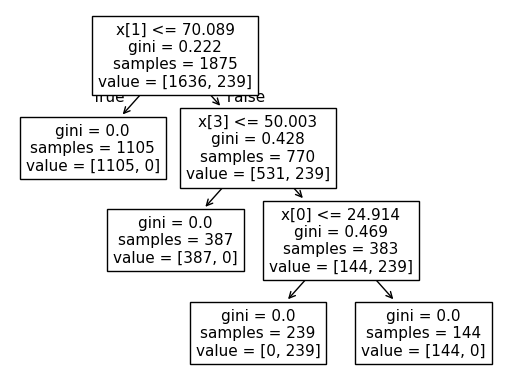

In [100]:
plot_tree(DTC)